In [54]:
import pandas as pd 

import numpy as np 

from sklearn.datasets import load_iris 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split 

 

In [55]:
# 데이터 불러오기 

iris = load_iris() 


In [56]:
#dataframe으로 변경 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

# print(iris_df) 
#타겟 추가 

#iris_df['species'] = iris.target 
#상황에 맞는 메뉴 있음 

iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
from sklearn.preprocessing import StandardScaler 

iris_df_scaled = StandardScaler().fit_transform(iris_df) 
iris_df_scaled 

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# k-means k=3 

In [66]:
from sklearn.cluster import KMeans 

# K-평균 군집화 알고리즘 모델 생성하기 

kmeans_3 = KMeans(n_clusters=3, random_state=0) 

kmeans_3.fit(iris_df_scaled) 

 

labels_3 = kmeans_3.labels_ 

centroids_3 = kmeans_3.cluster_centers_ 

labels_3, centroids_3 

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32),
 array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
        [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
        [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]]))

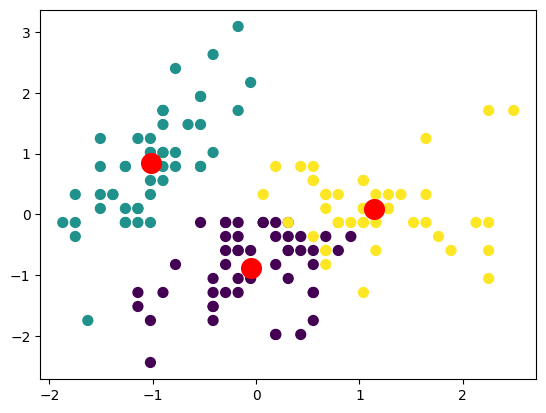

In [58]:
import matplotlib.pyplot as plt 

plt.scatter(iris_df_scaled[:,0], iris_df_scaled[:,1], c=labels_3, s=50) 
# 중심점 

plt.scatter(centroids_3[:,0], centroids_3[:,1], c='red', s=200) 

plt.show() 

In [59]:
from sklearn.metrics import silhouette_score, silhouette_samples 

# 전체 실루엣 점수 평균 계산 
silhouette_avg = silhouette_score(iris_df_scaled, labels_3) 
silhouette_avg 

0.45994823920518635

In [67]:
# 개별 실루엣 점수 

sample_silhouette_values = silhouette_samples(iris_df_scaled, labels_3) 

sample_silhouette_values[:10] 
# 클러스터별 평균 실루엣 점수 계산 

unique_labels = set(labels_3) 
silhouette_avg_per_cluster = {} 
for label in unique_labels: 

    cluster_silhouette_values = sample_silhouette_values[labels_3 == label] 

    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values) 

# 결과 출력 

for label, silhouette_avg in silhouette_avg_per_cluster.items(): 

    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}') 


Cluster 0: Average Silhouette Score = 0.39337721055814295
Cluster 1: Average Silhouette Score = 0.6363161744392947
Cluster 2: Average Silhouette Score = 0.3473922340262053


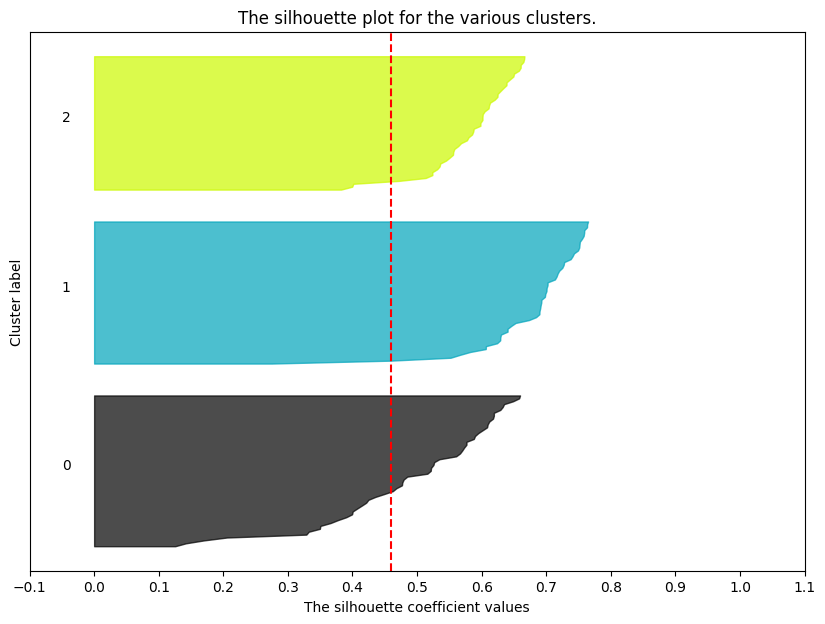

In [60]:
# 실루엣 차트 그리기 
cluster_labels = labels_3 
fig, ax1 = plt.subplots(figsize=(10, 7)) 


y_lower = 10 

for i in range(3): #클러스터 3개 

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] 
    ith_cluster_silhouette_values.sort() 

    size_cluster_i = ith_cluster_silhouette_values.shape[0] 

    y_upper = y_lower + size_cluster_i 

  

    color = plt.cm.nipy_spectral(float(i) / 3) 

    ax1.fill_betweenx(np.arange(y_lower, y_upper), 

                      0, ith_cluster_silhouette_values, 

                      facecolor=color, edgecolor=color, alpha=0.7) 

  

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 

    y_lower = y_upper + 10  # 다음 클러스터로 이동 

  

ax1.set_title("The silhouette plot for the various clusters.") 
ax1.set_xlabel("The silhouette coefficient values") 
ax1.set_ylabel("Cluster label") 

  

ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 
ax1.set_yticks([]) 
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1)) 
plt.show() 

# K =2인 코드 

In [61]:
from sklearn.cluster import KMeans 

# K-평균 군집화 알고리즘 모델 생성하기 

kmeans_2 = KMeans(n_clusters=2, random_state=0) 

kmeans_2.fit(iris_df_scaled) 

 

labels_2 = kmeans_2.labels_ 

centroids_2 = kmeans_2.cluster_centers_ 

In [62]:
# 전체 실루엣 점수 평균 계산 

silhouette_avg = silhouette_score(iris_df_scaled, labels_2) 

silhouette_avg 

# 개별 실루엣 점수 

sample_silhouette_values = silhouette_samples(iris_df_scaled, labels_2) 

sample_silhouette_values[:10] 

 

# 클러스터별 평균 실루엣 점수 계산 

unique_labels = set(labels_2) 

silhouette_avg_per_cluster = {} 

for label in unique_labels: 

    cluster_silhouette_values = sample_silhouette_values[labels_2 == label] 

    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values) 

    # 결과 출력 

for label, silhouette_avg in silhouette_avg_per_cluster.items(): 

    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')    

 

 

Cluster 0: Average Silhouette Score = 0.6807337356696789
Cluster 1: Average Silhouette Score = 0.5322582059625817


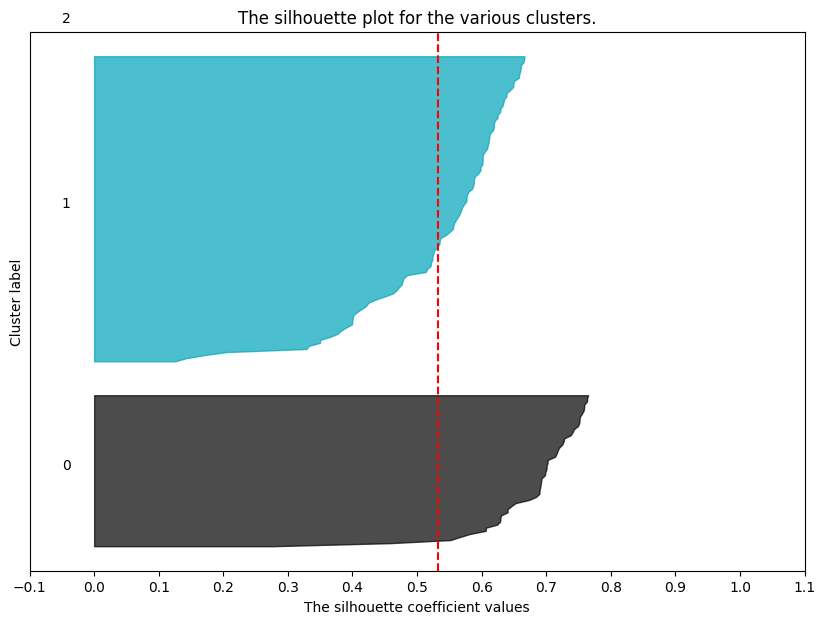

In [63]:
# 실루엣 차트 그리기 

 

cluster_labels = labels_2 

fig, ax1 = plt.subplots(figsize=(10, 7)) 

 

y_lower = 10 

for i in range(3): #클러스터 3개 

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] 
    ith_cluster_silhouette_values.sort() 
    size_cluster_i = ith_cluster_silhouette_values.shape[0] 
    y_upper = y_lower + size_cluster_i 

 

    color = plt.cm.nipy_spectral(float(i) / 3) 

    ax1.fill_betweenx(np.arange(y_lower, y_upper), 

                    0, ith_cluster_silhouette_values, 

                    facecolor=color, edgecolor=color, alpha=0.7) 

 

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 

 

    y_lower = y_upper + 10  # 다음 클러스터로 이동 

 

ax1.set_title("The silhouette plot for the various clusters.") 
ax1.set_xlabel("The silhouette coefficient values") 
ax1.set_ylabel("Cluster label") 

 

ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 
ax1.set_yticks([]) 
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1)) 
plt.show() 


# pca 분석


In [65]:
from sklearn.decomposition import PCA 

pca = PCA() 
pcomponents = pca.fit_transform(iris_df_scaled) 
pcomponents 


array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

In [68]:
# 각 성분별 설명력 조회 

exp_v = pca.explained_variance_ 
exp_v 

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [70]:
exp_vratio = pca.explained_variance_ratio_
exp_vratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [71]:
exp_v.cumsum()

array([2.93808505, 3.85824995, 4.00599178, 4.02684564])

In [73]:
exp_vratio.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])